In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import pandas as pd
import cartopy.io.shapereader as shpreader

In [2]:
df = pd.read_csv("./dados/Casosa.csv",sep=',',decimal=',')


In [3]:
df

,VERIFI\nCADO?,Q:\n1\n2\nou\n3,DATA,HORA\n(UTC),INCER-\nTEZA NO\nHORÁRIO\nMINUTOS,lat,lon,INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km),MUNICÍPIO,ES\nTA\nDO,TIPO: \nGRA\nVEN\nOU\nTOR,INTEN-\nSIDADE\n(cm OU\n km/h),l
0,NÃO,1,20210608,2140,15,-27.0813,-53.1738,12,Palmitos,SC,GRA,3.0,1
1,NÃO,1,20221021,1605,15,-27.2663,-51.9170,5,Concórdia,SC,GRA,3.0,1
2,NÃO,1,20221013,1920,15,-27.2654,-52.3434,7,Itá,SC,GRA,0.0,1
3,SIM,1,20210209,1800,30,-26.8295,-52.9750,8,Pinhalzinho,SC,GRA,0.0,1
4,SIM,1,20211230,1505,15,-27.1955,-52.1121,1,Concórdia,SC,GRA,1.5,1
5,SIM,1,20210325,1850,20,-27.1560,-52.3169,3,Seara,SC,GRA,3.0,1
6,SIM,1,20210917,930,15,-27.0704,-52.6134,1.5,Chapecó,SC,GRA,3.0,1
7,SIM,1,20210727,730,20,-27.1574,-52.3154,3,Seara,SC,GRA,2.5,1
8,SIM,1,20210727,750,15,-27.0866,-51.9956,3,Irani,SC,GRA,1.5,1
9,SIM,1,20221112,2015,20,-26.8496,-52.9885,3,Pinhalzinho,SC,GRA,2.0,1


In [4]:
reader = shpreader.Reader('SC_municipios_2021.shp')

counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

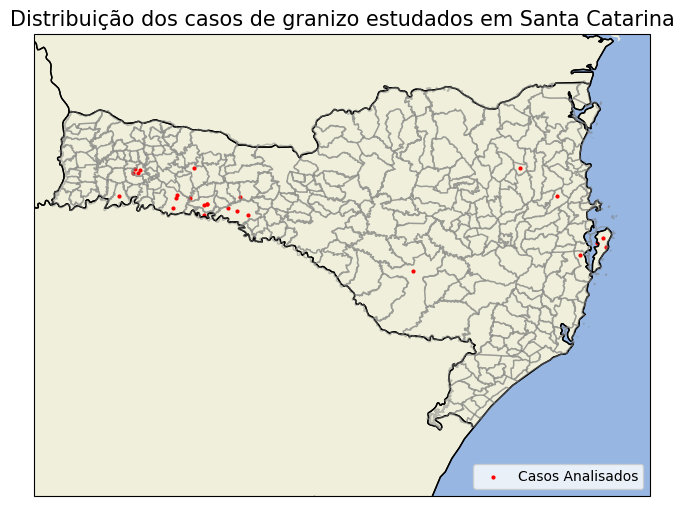

In [6]:
figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray', alpha=0.5)
ax.set_title('Distribuição dos casos de granizo estudados em Santa Catarina', fontsize=15)
ax.set_extent(
    #[-54,-51,-28,-26], oeste
    [-54,-48,-30,-25.5], 
    #[-48.7, -48.3 , -27.4 , -27.7], florianopolis 
    crs=ccrs.PlateCarree()

)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["lon"],
    y=df["lat"],
    color="red",
    s=4,
    alpha=1,
    transform=ccrs.PlateCarree()
)
ax.legend(['Casos Analisados'],loc=4)
figure.savefig(f'C:\\Users\\victo\\Desktop\\teste\\distribuição3.png', bbox_inches='tight',dpi = 500)
plt.show()